In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/preprocessData.csv')
df.head()

,Ratings,Reviews,Movies,Reviews_clean
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,disclaimer watched movie conditional agreement...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,writing hopes gets previous review film find s...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,write scathing review turd sandwich instead go...
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,saw previous spoof movies horrible gentlemen k...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,movie saw day early free feel like got ripped ...


In [3]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing
df=df[df.Label<'2']
data=df[['Reviews_clean','Reviews','Ratings','Label']]
print(data['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [4]:
#Importing dependencies for feature engineering
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [6]:
data.dropna(subset=['Reviews_clean'], inplace=True)

In [7]:
#Checking for missing value
data.isna().sum()

Reviews_clean    0
Reviews          0
Ratings          0
Label            0
dtype: int64

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
#countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
#x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
#x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

In [11]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [12]:
%%time
model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)


CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 43.6 µs


In [14]:
model_1=LogisticRegression()

In [15]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 2min 33s, sys: 7.15 s, total: 2min 40s
Wall time: 1min 47s


LogisticRegression()

In [16]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

In [17]:
y_test_list=y_test.tolist()
y_predict_list=y_predict.tolist()
test_list=test['Reviews_clean'].tolist()
rating_list=test['Ratings'].tolist()

In [18]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

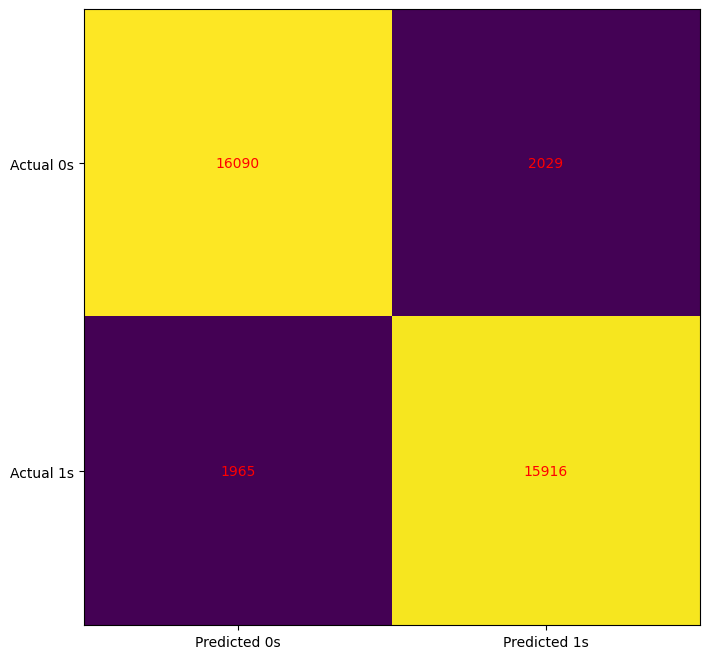

In [27]:
confusion_matrix_plot(y_test,y_predict)

In [20]:
!pip install colorama

In [21]:
from colorama import Fore, Back, Style
fn_dict={}
fp_dict={}
for i in range(0, len(y_test_list)):
    if ((y_test_list[i]=='0') & (y_predict_list[i]=='1')):
        fp_dict[i]=[test_list[i],rating_list[i]]
    elif((y_test_list[i]=='1') & (y_predict_list[i]=='0')):
        fn_dict[i]=[test_list[i],rating_list[i]]
    else:
        pass
    i+=1
for k,v in fp_dict.items():
    if v[1]<=2:
        print(Fore.RED +'False Positive: %s %s'%(k,v))
for k,v in fn_dict.items():
    if v[1]>=9:
        print(Fore.GREEN +'False Negative: %s %s'%(k,v))

False Positive: 51 ['enjoyed movies reasonably assumed like police academy movies quality humor degrade time revenge nerds iii instead not good quality humor dropped like rock tv shows', 1.0]
False Positive: 61 ['short non spoiler summary wake miscarriage problems couple moves los angeles troubled teenage daughter incredible deal beautiful victorian home turns result past tragedies grounds house comes complete creepy intrusive neighbors mysterious housekeeper badness ensues categorize pilot american horror story unrelentingly unpleasant cynical fetishistic horror clearly fans approach films come mind event horizon saw torture porn characters unlikeable psychological brutality dread non stop arguable sympathetic character vivien harmon mother played connie britton found story progressed weak inability communicate detachment daughter poor choices etc dylan mcdermott husband weaker characters equally single minded clichés abound haunted house twins dead animals shadows hooks easily seduce

#XAI: Explainable AI by Shap and LIME

##Explain Marginal Contribution of Features by Shap

In [23]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.6 MB/s eta 0:00:00


In [24]:
import shap

shap.initjs()

In [26]:
explainer = shap.Explainer(model_1, x_train_tfidf, feature_names=tfidfvect.get_feature_names_out())
shap_values = explainer(x_test_tfidf)


In [ ]:
shap.plots.beeswarm(shap_values)